### 딥-러닝 과정 CNN | 2020.02.28. 

### 실습. Keras 모델 생성/학습 - 로컬 이미지로 CNN 학습

In [1]:
# 1. zip 파일 압축 풀기

import zipfile
with zipfile.ZipFile('data_set.zip', 'r') as zip_ref:
    zip_ref.extractall('data_set')

In [2]:
# 2. 데이터 가져오기

from keras.preprocessing.image import ImageDataGenerator

# 훈련셋
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('data_set/train',
                                                    target_size=(28, 28),
                                                    batch_size=10,
                                                    class_mode='categorical')

# 평가셋
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory('data_set/test',
                                                  target_size=(28, 28),    
                                                  batch_size=10,
                                                  class_mode='categorical')

Using TensorFlow backend.


Found 300 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [3]:
# 3. 패키지 호출
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D


In [ ]:
# 4. 모델 구성하기

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=(28, 28, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

print(model.summary())

In [5]:
# 5. 모델 학습과정 설정하기

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# 6. 모델 학습시키기

history = model.fit_generator(train_generator,
                              steps_per_epoch=30,
                              epochs=50,
                              validation_data=test_generator,
                              validation_steps=6)

Epoch 1/50
30/30 [==============================] - 0s 8ms/step - loss: 2.9802e-08 - accuracy: 1.0000 - val_loss: 7.1178e-05 - val_accuracy: 1.0000
Epoch 2/50
30/30 [==============================] - 0s 8ms/step - loss: 2.7418e-08 - accuracy: 1.0000 - val_loss: 4.7684e-08 - val_accuracy: 1.0000
Epoch 3/50
30/30 [==============================] - 0s 8ms/step - loss: 2.9405e-08 - accuracy: 1.0000 - val_loss: 1.7132e-04 - val_accuracy: 1.0000
Epoch 4/50
30/30 [==============================] - 0s 8ms/step - loss: 2.7815e-08 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 5/50
30/30 [==============================] - 0s 8ms/step - loss: 2.6226e-08 - accuracy: 1.0000 - val_loss: 3.7669e-06 - val_accuracy: 1.0000
Epoch 6/50
30/30 [==============================] - 0s 8ms/step - loss: 2.7815e-08 - accuracy: 1.0000 - val_loss: 2.2117e-04 - val_accuracy: 1.0000
Epoch 7/50
30/30 [==============================] - 0s 8ms/step - loss: 2.5034e-08 - accuracy: 1.0000 - val_loss: 1.

In [13]:
# 7. 모델 평가하기

scores = model.evaluate_generator(test_generator)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

accuracy: 100.00%


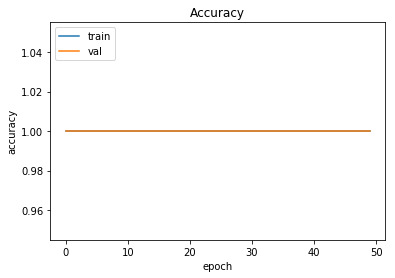

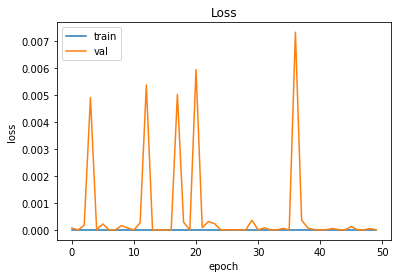

In [15]:
# 8. 학습 시각화하기

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()